In [ ]:
#Смоделировать игру против лотерейного автомата типа “777”. Игрок платит 1 руб., после чего выпадает случайное целое число, равномерно распределенное от 0 до 999. При некоторых значениях числа игрок получает выигрыш (см. справа)
#Выгодна ли игра игроку?

#Сколько в среднем приобретает или теряет игрок за одну игру?

In [5]:
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Колесо автомата с числами
AUTOMATE_PIN = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Количество одновременно выпадающих чисел автомата
AUTOMATE_PATTERN = 3
PRIZES = {
    r'777': 200,
    r'999': 100,
    r'555': 50,
    r'333': 15,
    r'111': 10,
    r'\d77': 5,
    r'\d{2}7': 3,
    r'\d00': 2,
    r'\d{2}0': 1
}

In [9]:
# Число попыток игрока
user_trials = 1000
# Банк игрока
user_bank = 1000
# Стоимость ставки
bet = 1


def make_trial():
    pattern = ''
    for p in range(AUTOMATE_PATTERN):
        pattern = pattern + AUTOMATE_PIN[random.randint(0, len(AUTOMATE_PIN) - 1)]
    return pattern


def get_prize(_trial):
    ret_val = 0
    for _prize, val in PRIZES.items():
        reg_exp = re.compile(_prize)
        if reg_exp.findall(_trial):
            ret_val = val
            break
    return ret_val

Выводы:
Число ставок: 9280
Максимальная сумма в банке игрока: 1215
Максимальный выигрыш: 200
Сумма выигрышей: 8280
Математическое ожидание выигрыша: 0.8922413793103449


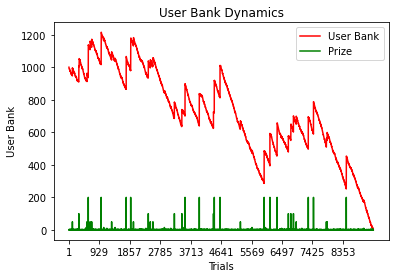

In [10]:
trial_count = 0
row = {}
df = pd.DataFrame()
while user_bank > 0:
    trial_count += 1
    trial = make_trial()
    prize = get_prize(trial)
    user_bank += prize
    row = {'trial_count': trial_count, 'user_bank': user_bank, 'trial': trial, 'prize': prize}
    user_bank -= bet
    df = pd.concat([df, pd.DataFrame([row])])

print('Выводы:')
print(f'Число ставок: {df.trial_count.max()}')
print(f'Максимальная сумма в банке игрока: {df.user_bank.max()}')
print(f'Максимальный выигрыш: {df.prize.max()}')
print(f'Сумма выигрышей: {df.prize.sum()}')
print(f'Математическое ожидание выигрыша: {df.prize.sum() / (df.trial_count.max() * bet)}')

plt.plot(df.trial_count, df.user_bank, color='r')
plt.plot(df.trial_count, df.prize, color='g')
plt.xlabel('Trials')
plt.ylabel('User Bank')
plt.title('User Bank Dynamics')
plt.xticks(np.arange(1, df.trial_count.max(), int(df.trial_count.max() / 10)))
plt.legend(labels= ['User Bank', 'Prize'])
plt.show()